In [1]:
from preprocess import *
from DANN_CNN import *
import torch
import torch.nn as nn
import math
from torch.autograd import Function
from sklearn.manifold import TSNE

data_list = load_data()

In [2]:
X_all = []
Y_class = []
Y_domain = []

for i in range(12):
    [X, Y] = data_list[i]
    X = get_CNN_data(X)
    X_all.append(X)
    Y_class.append(Y)
    Y_domain.append(np.full(X.shape[0], i))

X_all = np.concatenate(X_all)
Y_class = np.concatenate(Y_class)
Y_domain = np.concatenate(Y_domain)
assert(X_all.shape[0] == Y_domain.shape[0])

In [26]:
best_weights = torch.load("best_dann_no_domain_weights.pth")

In [27]:
model = DANN(num_classes=3, num_domains=12).cuda()
model.load_state_dict(best_weights)

with torch.no_grad():
    X_all_tensor = torch.from_numpy(X_all).float().cuda()
    X_feat = np.array(model.get_feature(X_all_tensor).cpu())

tsne = TSNE(n_components=2, perplexity=30, learning_rate=200, n_iter=1500, random_state=42)
X_2d = tsne.fit_transform(X_feat)

/home/valencia/.local/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


In [28]:
def plot(X_2d, Y_domain, name):

    plt.figure(figsize=(8, 6))

    num_domains = len(np.unique(Y_domain))
    colors = plt.cm.get_cmap('tab20', num_domains)

    for i in range(num_domains):
        idx = (Y_domain == i)
        plt.scatter(
            X_2d[idx, 0],
            X_2d[idx, 1],
            s=20,
            color=colors(i),
            label=f"Person {i}"
        )

    plt.legend()
    plt.title(name)
    plt.xlabel("TSNE-1")
    plt.ylabel("TSNE-2")
    plt.tight_layout()
    plt.show()

/tmp/ipykernel_14450/548309138.py:6: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap('tab20', num_domains)


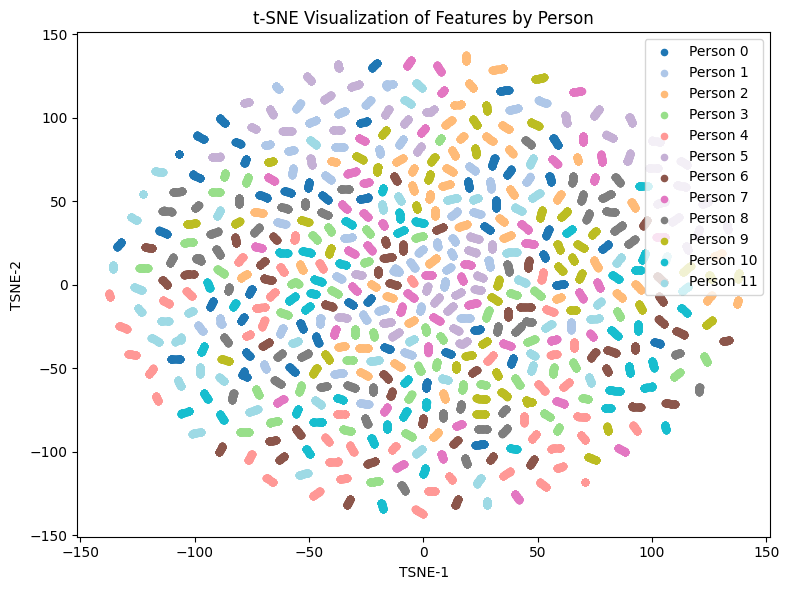

In [29]:
plot(X_2d, Y_domain, "t-SNE Visualization of Features by Person")

/tmp/ipykernel_14450/548309138.py:6: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap('tab20', num_domains)


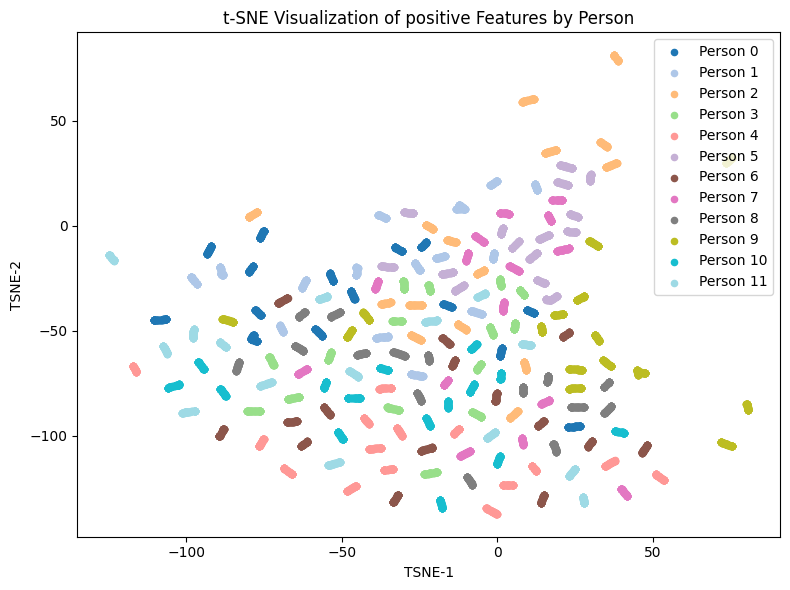

In [30]:

mask0 = Y_class == 0
plot(X_2d[mask0], Y_domain[mask0], "t-SNE Visualization of positive Features by Person")

/tmp/ipykernel_14450/548309138.py:6: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap('tab20', num_domains)


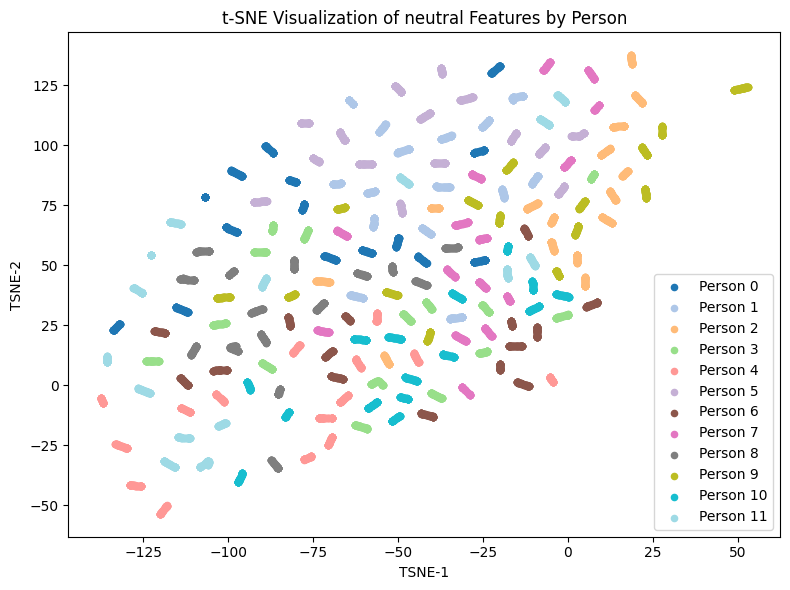

In [31]:

mask1 = Y_class == 1
plot(X_2d[mask1], Y_domain[mask1], "t-SNE Visualization of neutral Features by Person")

/tmp/ipykernel_14450/548309138.py:6: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap('tab20', num_domains)


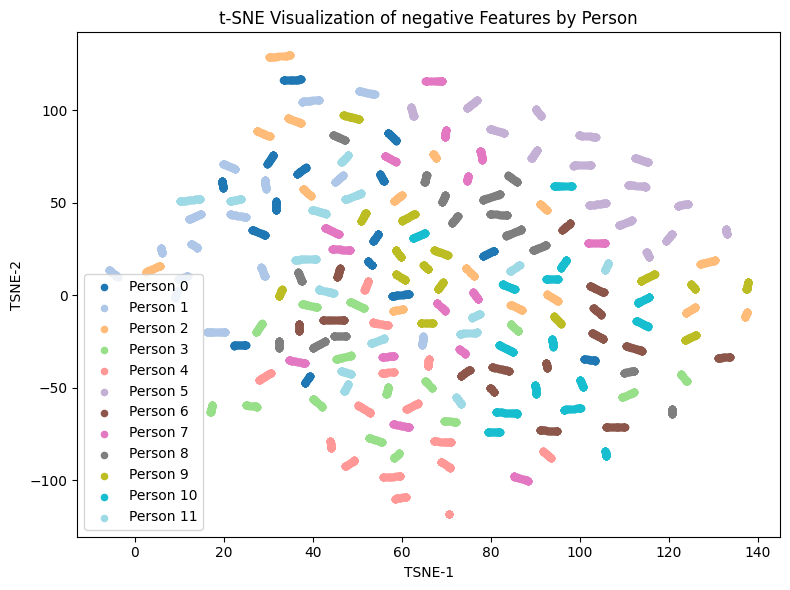

In [32]:

mask2 = Y_class == 2
plot(X_2d[mask2], Y_domain[mask2], "t-SNE Visualization of negative Features by Person")